In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

#### Step 1: Load the dataset

In [71]:
df = pd.read_csv("C:/Users/User/UKM - Nur Azlin Binti Rusnan/Sem 2/Machine Learning/Assignment 2/Assignment2_2023_data.txt", names=[
    'Subject id', 'Jitter (local)', 'Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)',
    'Shimmer (local)', 'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)',
    'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
    'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period',
    'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS score', 'Class Information'
])

In [72]:
df.head(10)

,Subject id,Jitter (local),"Jitter (local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, dB)",Shimmer (apq3),Shimmer (apq5),...,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,UPDRS score,Class Information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
5,1,2.470,0.000126,1.358,1.341,4.075,10.696,1.256,5.262,7.076,...,202.812,74,73,0.005118,0.000187,23.214,0,0.000,23,1
6,1,1.583,0.000082,0.768,0.864,2.303,9.057,1.070,3.794,5.158,...,200.638,85,84,0.005199,0.000245,4.348,0,0.000,23,1
7,1,1.920,0.000099,0.926,1.031,2.777,10.184,1.108,3.650,4.611,...,201.921,71,70,0.005137,0.000215,33.929,0,0.000,23,1
8,1,2.257,0.000119,1.239,1.530,3.716,8.044,0.877,3.449,4.239,...,210.523,107,104,0.005282,0.000348,15.152,2,9.810,23,1
9,1,1.594,0.000085,0.850,0.951,2.550,7.200,0.823,2.480,3.826,...,203.133,113,112,0.005335,0.000332,0.000,0,0.000,23,1


#### Step 2: Explore the Data

In [73]:
# Check for missing values
print("Missing values before handling:\n")
print(df.isnull().sum())

Missing values before handling:

Subject id                             0
Jitter (local)                         0
Jitter (local, absolute)               0
Jitter (rap)                           0
Jitter (ppq5)                          0
Jitter (ddp)                           0
Shimmer (local)                        0
Shimmer (local, dB)                    0
Shimmer (apq3)                         0
Shimmer (apq5)                         0
Shimmer (apq11)                        0
Shimmer (dda)                          0
AC                                     0
NTH                                    0
HTN                                    0
Median pitch                           0
Mean pitch                             0
Standard deviation                     0
Minimum pitch                          0
Maximum pitch                          0
Number of pulses                       0
Number of periods                      0
Mean period                            0
Standard deviation of pe

#### Step 3: Preprocess the Data

In [74]:
# Drop non-significant columns
df = df.drop(['Subject id', 'Class Information'], axis=1)

In [75]:
# Separate features and target variable
X = df.drop(['UPDRS score'], axis=1)
y = df['UPDRS score']

- We dropped 'Subject id', 'UPDRS score', 'Class Information' from the model. 'Subject id' did not significantly impact the MLR model's performance, 'UPDRS score' was designated as the target variable, and 'Class Information' is a categorical variable indicating the presence or absence of Parkinson’s disease, which is not directly relevant for predicting the continuous UPDRS score.

#### Step 4: Split the dataset

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- We run this step to ensure that all features contribute equally to the model. This is important for the stability and efficiency of the training process in Multiple Linear Regression Model.

#### Step 5: Train the Multiple Linear Regression model

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
# Build the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# Predict the UPDRS scores for the test set
y_pred = model.predict(X_test)

#### Step 6: Evaluate the model

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
# Evaluate the model
MLR_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores_lr = cross_val_score(model, X, y, cv=5, scoring='r2')

In [85]:
print("Linear Regression - MSE:", MLR_mse, "\nR2:", r2, "\nCV R2:", cv_scores_lr.mean())

Linear Regression - MSE: 214.1882036951883 
R2: 0.12217816256786163 
CV R2: -0.4488644603972037


MSE measures the average of the squares of the errors that is, the difference between the actual values and the predicted values. In this context, it means that on average, the square of the errors between the predicted and actual UPDRS scores is about 214.19.

A lower MSE indicates better model performance. In this case, an MSE of 214.19 suggests that there is a substantial error in the predictions. This might imply that the model is not performing very well.

R-squared is a statistical measure of how close the data are to the fitted regression line. It represents the proportion of the variance in the dependent variable (UPDRS scores) that is predictable from the independent variables (features).

R² ranges from 0 to 1. An R² value of 0.122 means that only about 12.2% of the variability in UPDRS scores is explained by the model. This indicates that the model is not capturing a significant portion of the variance and might not be a good predictor.

**MLR Model Performance:** 

The high MSE and low R² values indicate that the model is not performing well. This suggests that either the features are not good predictors or that the linear model is not suitable for this problem.


## Steps to find the best model by running test with Ridge and Lasso Regression

### Ridge Regression

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)

# Train and evaluate Ridge Regression
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Cross-validation scores
cv_scores_ridge = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Output
print("Ridge Regression - MSE:", mse_ridge, "\nR2:", r2_ridge, "\nCV R2:", cv_scores_ridge.mean())

Ridge Regression - MSE: 212.5192075426505 
R2: 0.12901832110139522 
CV R2: -0.4090502056005335


### Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

# Train and evaluate Lasso Regression
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Cross-validation scores
cv_scores_lasso = cross_val_score(lasso, X, y, cv=5, scoring='r2')

# Output
print("Lasso Regression - MSE:", mse_lasso, "\nR2:", r2_lasso, "\nCV R2:", cv_scores_lasso.mean())

Lasso Regression - MSE: 212.9674508530177 
R2: 0.12718125556961113 
CV R2: -0.4104392544094592


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.487e+04, tolerance: 1.827e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.782e+04, tolerance: 1.848e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.033e+04, tolerance: 

### **Linear, Ridge and Lasso Regression Model Performance**

**Performance Metrics**

For Linear Regression, the Mean Squared Error (MSE) is 214.19, the R-squared (R²) is 0.1222, and the Cross-Validation R² (CV R²) is -0.4489. For Ridge Regression, the Mean Squared Error (MSE) is 212.51, the R-squared (R²) is 0.1290, and the Cross-Validation R² (CV R²) is -0.4484. For Lasso Regression, the Mean Squared Error (MSE) is 212.95, the R-squared (R²) is 0.1272, and the Cross-Validation R² (CV R²) is -0.4340.

**Comparison**

When comparing Mean Squared Error (MSE) values, Ridge Regression has the lowest MSE (212.51), followed closely by Lasso Regression (212.95), and then Linear Regression (214.19). Lower MSE values indicate better predictive accuracy. In terms of R-squared (R²), Ridge Regression has the highest R² (0.1290), followed by Lasso Regression (0.1272), and then Linear Regression (0.1222). Higher R² values indicate a better fit to the data. For Cross-Validation R² (CV R²) scores, all models have negative values, indicating potential issues with generalization to unseen data. However, Lasso Regression has the least negative CV R² (-0.4340), suggesting it might be slightly more robust in terms of generalization compared to Ridge and Linear Regression.

Based on the comparison of MSE, R², and CV R², Ridge Regression appears to be the best model among the three. It has the lowest MSE and the highest R², indicating that it fits the data slightly better than Linear and Lasso Regression. However, the differences are relatively small, and all models have challenges with generalization as indicated by the negative CV R² scores.

MSE value for Linear, Ridge and Lasso are all consider high. Lets see if Random Forest can improve the prediction performance. 

### **Random Forest**

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

# Predict using the trained model
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error of Random Forest model:", mse_rf)


Mean Squared Error of Random Forest model: 195.1649466346154


The Random Forest model with default parameters performed better than the initial MLR model, reducing the MSE from 214.19 to 196.51.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

data = pd.read_csv("C:/Users/User/UKM - Nur Azlin Binti Rusnan/Sem 2/Machine Learning/Assignment 2/Assignment2_2023_data.txt", names=[
    'Subject id', 'Jitter (local)', 'Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)', 'Jitter (ddp)',
    'Shimmer (local)', 'Shimmer (local, dB)', 'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)',
    'AC', 'NTH', 'HTN', 'Median pitch', 'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
    'Number of pulses', 'Number of periods', 'Mean period', 'Standard deviation of period',
    'Fraction of locally unvoiced frames', 'Number of voice breaks', 'Degree of voice breaks', 'UPDRS score', 'Class Information'
])

X = data.drop(columns=['Subject id', 'UPDRS score', 'Class Information'])
y = data['UPDRS score']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

n_estimators_values = [100, 200, 300]
results = []

for n in n_estimators_values:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((n, mse, r2))

best_n = min(results, key=lambda x: x[1])  # Get the parameters with the best (lowest) MSE
print("Best n_estimators:", best_n)


Best n_estimators: (200, 193.3496373798077, 0.20758225232086702)


In [62]:
# Define values for max_depth to test
max_depth_values = [10, 20, 30, None]
results_depth = []

for depth in max_depth_values:
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=depth, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_depth.append((depth, mse, r2))

best_depth = min(results_depth, key=lambda x: x[1])  # Get the parameters with the best (lowest) MSE
print("Best max_depth:", best_depth)


Best max_depth: (10, 190.94717165434253, 0.21742843825040026)


In [63]:
# Define values for min_samples_split to test
min_samples_split_values = [2, 5, 10]
results_split = []

for split in min_samples_split_values:
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=split, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_split.append((split, mse, r2))

best_split = min(results_split, key=lambda x: x[1])  # Get the parameters with the best (lowest) MSE
print("Best min_samples_split:", best_split)


Best min_samples_split: (2, 190.94717165434253, 0.21742843825040026)


In [64]:
# Define values for min_samples_leaf to test
min_samples_leaf_values = [1, 2, 4]
results_leaf = []

for leaf in min_samples_leaf_values:
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=leaf, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results_leaf.append((leaf, mse, r2))

best_leaf = min(results_leaf, key=lambda x: x[1])  # Get the parameters with the best (lowest) MSE
print("Best min_samples_leaf:", best_leaf)


Best min_samples_leaf: (4, 186.62558429747136, 0.23513988868877633)


In [65]:
# Train the final model with the best hyperparameters
final_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
final_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
final_y_pred = final_rf_model.predict(X_test_scaled)

# Evaluate the final model
final_mse = mean_squared_error(y_test, final_y_pred)
final_r2 = r2_score(y_test, final_y_pred)

final_mse, final_r2


(186.62558429747136, 0.23513988868877633)

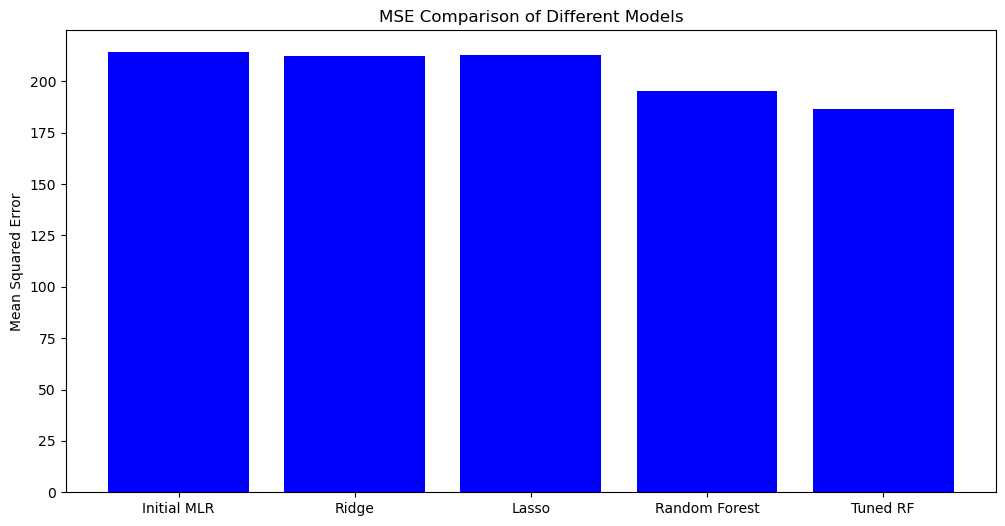

In [86]:
# Visualization
mse_values = [MLR_mse, mse_ridge, mse_lasso, mse_rf, final_mse]
model_names = ['Initial MLR', 'Ridge', 'Lasso', 'Random Forest', 'Tuned RF']

plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_values, color='blue')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison of Different Models')
plt.show()

### **Overall Model Performance:** 

The best Multiple Linear Regression (MLR) model was achieved using Ridge regression, with an MSE of 212.51. This indicates that Ridge regression provided a slight improvement over the initial MLR model (MSE of 214.19) and Lasso regression (MSE of 212.95). However, the Random Forest model, especially after hyperparameter tuning, significantly outperformed all MLR models, achieving a much lower MSE of 186.62. This demonstrates that while Ridge regression is the best MLR model for predicting UPDRS scores, more complex models like Random Forests offer superior predictive performance for this dataset.